In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer


In [2]:
df_weekdays=pd.read_csv('athens_weekdays.csv')
df_weekends=pd.read_csv('athens_weekends.csv')

In [3]:
df_weekdays

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0              0  129.824479  Entire home/apt        False         False   
1              1  138.963748  Entire home/apt        False         False   
2              2  156.304923  Entire home/apt        False         False   
3              3   91.627024  Entire home/apt        False         False   
4              4   74.051508     Private room        False          True   
...          ...         ...              ...          ...           ...   
2648        2648  292.222248  Entire home/apt        False         False   
2649        2649  306.048321  Entire home/apt        False         False   
2650        2650  275.818433  Entire home/apt        False         False   
2651        2651  313.078527  Entire home/apt        False         False   
2652        2652  241.136081  Entire home/apt        False         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 4.0              False      0    0                10.0   
1                 4.0               True      1    0                10.0   
2                 3.0               True      0    1                10.0   
3                 4.0               True      1    0                10.0   
4                 2.0              False      0    0                10.0   
...               ...                ...    ...  ...                 ...   
2648              4.0               True      0    1                10.0   
2649              3.0               True      0    0                10.0   
2650              4.0               True      0    1                10.0   
2651              2.0               True      1    0                10.0   
2652              2.0               True      1    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          100.0         2  2.813964    0.881890   55.348572   
1                           96.0         1  0.407293    0.304568  240.306654   
2                           98.0         1  1.237211    0.288488  199.507366   
3                           99.0         1  4.367457    0.297467   39.803047   
4                          100.0         1  2.194185    0.385266   78.733405   
...                          ...       ...       ...         ...         ...   
2648                       100.0         1  0.453470    0.423897  323.568799   
2649                        98.0         1  0.317525    0.289876  289.750259   
2650                       100.0         1  1.391229    0.063723  235.298508   
2651                        99.0         2  1.054541    0.409451  117.986483   
2652                        98.0         1  0.998053    0.530075  606.993190   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  
0            2.086871   78.778377         5.915160  23.76600  37.98300  
1            9.060559  407.167696        30.572629  23.73168  37.97776  
2            7.522257  395.967403        29.731642  23.72200  37.97900  
3            1.500740   58.706578         4.408047  23.72712  38.01435  
4            2.968577  113.325973         8.509204  23.73391  37.99529  
...               ...         ...              ...       ...       ...  
2648        12.199888  478.298534        35.913565  23.73184  37.97260  
2649        10.924789  589.045383        44.229112  23.73265  37.97370  
2650         8.871732  298.440887        22.408758  23.72676  37.96506  
2651         4.448581  177.290336        13.312037  23.74600  37.98000  
2652        22.886166  390.018063        29.284930  23.72732  37.96924  

[2653 rows x 20 columns]

In [4]:
df_weekends

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0              0  138.963748  Entire home/apt        False         False   
1              1   91.627024  Entire home/apt        False         False   
2              2   76.629250     Private room        False          True   
3              3  151.852459  Entire home/apt        False         False   
4              4   98.657231  Entire home/apt        False         False   
...          ...         ...              ...          ...           ...   
2622        2622   74.051508  Entire home/apt        False         False   
2623        2623  295.737351  Entire home/apt        False         False   
2624        2624  169.193635  Entire home/apt        False         False   
2625        2625  160.991728  Entire home/apt        False         False   
2626        2626  192.393317  Entire home/apt        False         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 4.0               True      1    0                10.0   
1                 4.0               True      1    0                10.0   
2                 2.0              False      0    0                10.0   
3                 4.0               True      0    1                10.0   
4                 2.0               True      1    0                10.0   
...               ...                ...    ...  ...                 ...   
2622              3.0               True      0    0                10.0   
2623              4.0               True      0    1                10.0   
2624              4.0               True      0    1                10.0   
2625              4.0               True      1    0                10.0   
2626              4.0              False      0    1                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
2622                        98.0         1  3.311976    1.856865   49.097725   
2623                       100.0         1  1.800556    0.571033  146.240703   
2624                        99.0         2  3.845100    0.786416   42.260382   
2625                       100.0         1  4.827460    0.141952   35.700540   
2626                        99.0         1  1.776319    0.317120  107.126909   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  
0            9.054205  407.167958         6.080622  23.73168  37.97776  
1            1.499687   58.706522         0.876720  23.72712  38.01435  
2            2.966519  113.326684         1.692414  23.73391  37.99529  
3            2.591282  101.162069         1.510748  23.73200  37.99800  
4            2.370037   92.611125         1.383049  23.73100  38.00000  
...               ...         ...              ...       ...       ...  
2622         1.849891   71.119758         1.062098  23.75000  38.00306  
2623         5.510019  203.884287         3.044796  23.71500  37.97400  
2624         1.592276   60.948754         0.910205  23.76657  37.99986  
2625         1.345116   52.659912         0.786420  23.73300  38.01900  
2626         4.036300  149.191222         2.228013  23.72863  37.99064  

[2627 rows x 20 columns]

In [5]:
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2653 non-null   int64  
 1   realSum                     2653 non-null   float64
 2   room_type                   2653 non-null   object 
 3   room_shared                 2653 non-null   bool   
 4   room_private                2653 non-null   bool   
 5   person_capacity             2653 non-null   float64
 6   host_is_superhost           2653 non-null   bool   
 7   multi                       2653 non-null   int64  
 8   biz                         2653 non-null   int64  
 9   cleanliness_rating          2653 non-null   float64
 10  guest_satisfaction_overall  2653 non-null   float64
 11  bedrooms                    2653 non-null   int64  
 12  dist                        2653 non-null   float64
 13  metro_dist                  2653 

In [6]:
df_weekends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2627 non-null   int64  
 1   realSum                     2627 non-null   float64
 2   room_type                   2627 non-null   object 
 3   room_shared                 2627 non-null   bool   
 4   room_private                2627 non-null   bool   
 5   person_capacity             2627 non-null   float64
 6   host_is_superhost           2627 non-null   bool   
 7   multi                       2627 non-null   int64  
 8   biz                         2627 non-null   int64  
 9   cleanliness_rating          2627 non-null   float64
 10  guest_satisfaction_overall  2627 non-null   float64
 11  bedrooms                    2627 non-null   int64  
 12  dist                        2627 non-null   float64
 13  metro_dist                  2627 

In [7]:
df_weekends.head()

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  138.963748  Entire home/apt        False         False   
1           1   91.627024  Entire home/apt        False         False   
2           2   76.629250     Private room        False          True   
3           3  151.852459  Entire home/apt        False         False   
4           4   98.657231  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              4.0               True      1    0                10.0   
1              4.0               True      1    0                10.0   
2              2.0              False      0    0                10.0   
3              4.0               True      0    1                10.0   
4              2.0               True      1    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        96.0         1  0.407278    0.304570  240.306496   
1                        99.0         1  4.367463    0.297474   39.802996   
2                       100.0         1  2.194174    0.385247   78.734001   
3                       100.0         2  2.508982    0.563473   68.774881   
4                        95.0         1  2.740581    0.725045   62.902859   

   attr_index_norm  rest_index  rest_index_norm       lng       lat  
0         9.054205  407.167958         6.080622  23.73168  37.97776  
1         1.499687   58.706522         0.876720  23.72712  38.01435  
2         2.966519  113.326684         1.692414  23.73391  37.99529  
3         2.591282  101.162069         1.510748  23.73200  37.99800  
4         2.370037   92.611125         1.383049  23.73100  38.00000

In [8]:
df_final=pd.merge(right=df_weekdays,left=df_weekends,how='outer')

In [9]:
df_final['realSum'].sort_values(ascending=False)

4137    18545.450285
1611     1043.282638
5267     1043.282638
1401      869.167858
3877      869.167858
            ...     
570        42.884259
583        42.884259
584        42.884259
4541       42.884259
4495       42.884259
Name: realSum, Length: 5280, dtype: float64

In [10]:
df_final['room_type'].value_counts()

Entire home/apt    4872
Private room        397
Shared room          11
Name: room_type, dtype: int64

In [11]:
df_final.replace(to_replace=[True,False],value=[1,0],inplace=True)

In [12]:
df_weekends.replace(to_replace=[True,False],value=[1,0],inplace=True)

In [13]:
df_weekdays.replace(to_replace=[True,False],value=[1,0],inplace=True)

In [14]:
df_weekends

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0              0  138.963748  Entire home/apt            0             0   
1              1   91.627024  Entire home/apt            0             0   
2              2   76.629250     Private room            0             1   
3              3  151.852459  Entire home/apt            0             0   
4              4   98.657231  Entire home/apt            0             0   
...          ...         ...              ...          ...           ...   
2622        2622   74.051508  Entire home/apt            0             0   
2623        2623  295.737351  Entire home/apt            0             0   
2624        2624  169.193635  Entire home/apt            0             0   
2625        2625  160.991728  Entire home/apt            0             0   
2626        2626  192.393317  Entire home/apt            0             0   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 4.0                  1      1    0                10.0   
1                 4.0                  1      1    0                10.0   
2                 2.0                  0      0    0                10.0   
3                 4.0                  1      0    1                10.0   
4                 2.0                  1      1    0                10.0   
...               ...                ...    ...  ...                 ...   
2622              3.0                  1      0    0                10.0   
2623              4.0                  1      0    1                10.0   
2624              4.0                  1      0    1                10.0   
2625              4.0                  1      1    0                10.0   
2626              4.0                  0      0    1                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
2622                        98.0         1  3.311976    1.856865   49.097725   
2623                       100.0         1  1.800556    0.571033  146.240703   
2624                        99.0         2  3.845100    0.786416   42.260382   
2625                       100.0         1  4.827460    0.141952   35.700540   
2626                        99.0         1  1.776319    0.317120  107.126909   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  
0            9.054205  407.167958         6.080622  23.73168  37.97776  
1            1.499687   58.706522         0.876720  23.72712  38.01435  
2            2.966519  113.326684         1.692414  23.73391  37.99529  
3            2.591282  101.162069         1.510748  23.73200  37.99800  
4            2.370037   92.611125         1.383049  23.73100  38.00000  
...               ...         ...              ...       ...       ...  
2622         1.849891   71.119758         1.062098  23.75000  38.00306  
2623         5.510019  203.884287         3.044796  23.71500  37.97400  
2624         1.592276   60.948754         0.910205  23.76657  37.99986  
2625         1.345116   52.659912         0.786420  23.73300  38.01900  
2626         4.036300  149.191222         2.228013  23.72863  37.99064  

[2627 rows x 20 columns]

In [15]:
df_weekdays.drop(columns=['Unnamed: 0','rest_index_norm','attr_index_norm'],inplace=True)
df_weekends.drop(columns=['Unnamed: 0','rest_index_norm','attr_index_norm'],inplace=True)
df_final.drop(columns=['Unnamed: 0','rest_index_norm','attr_index_norm'],inplace=True)
df_final.drop(index=4137, inplace=True)

In [16]:
df_final

realSum        room_type  room_shared  room_private  person_capacity  \
0     138.963748  Entire home/apt            0             0              4.0   
1      91.627024  Entire home/apt            0             0              4.0   
2      76.629250     Private room            0             1              2.0   
3     151.852459  Entire home/apt            0             0              4.0   
4      98.657231  Entire home/apt            0             0              2.0   
...          ...              ...          ...           ...              ...   
5275  292.222248  Entire home/apt            0             0              4.0   
5276  306.048321  Entire home/apt            0             0              3.0   
5277  275.818433  Entire home/apt            0             0              4.0   
5278  313.078527  Entire home/apt            0             0              2.0   
5279  241.136081  Entire home/apt            0             0              2.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     1      1    0                10.0   
2                     0      0    0                10.0   
3                     1      0    1                10.0   
4                     1      1    0                10.0   
...                 ...    ...  ...                 ...   
5275                  1      0    1                10.0   
5276                  1      0    0                10.0   
5277                  1      0    1                10.0   
5278                  1      1    0                10.0   
5279                  1      1    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
5275                       100.0         1  0.453470    0.423897  323.568799   
5276                        98.0         1  0.317525    0.289876  289.750259   
5277                       100.0         1  1.391229    0.063723  235.298508   
5278                        99.0         2  1.054541    0.409451  117.986483   
5279                        98.0         1  0.998053    0.530075  606.993190   

      rest_index       lng       lat  
0     407.167958  23.73168  37.97776  
1      58.706522  23.72712  38.01435  
2     113.326684  23.73391  37.99529  
3     101.162069  23.73200  37.99800  
4      92.611125  23.73100  38.00000  
...          ...       ...       ...  
5275  478.298534  23.73184  37.97260  
5276  589.045383  23.73265  37.97370  
5277  298.440887  23.72676  37.96506  
5278  177.290336  23.74600  37.98000  
5279  390.018063  23.72732  37.96924  

[5279 rows x 17 columns]

In [17]:
barplot_df=df_weekdays.groupby('room_type')['realSum'].mean()

<AxesSubplot:xlabel='room_type', ylabel='realSum'>

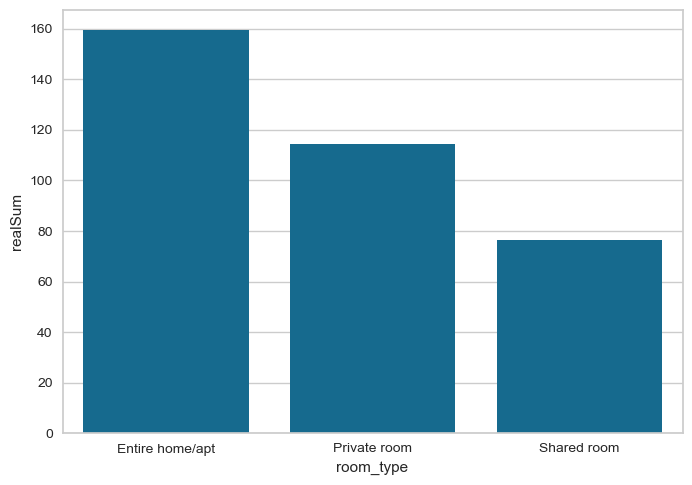

In [18]:
sns.barplot(barplot_df)


In [19]:
barplot_df=df_final.groupby('room_type')['guest_satisfaction_overall'].mean()

<AxesSubplot:xlabel='room_type', ylabel='guest_satisfaction_overall'>

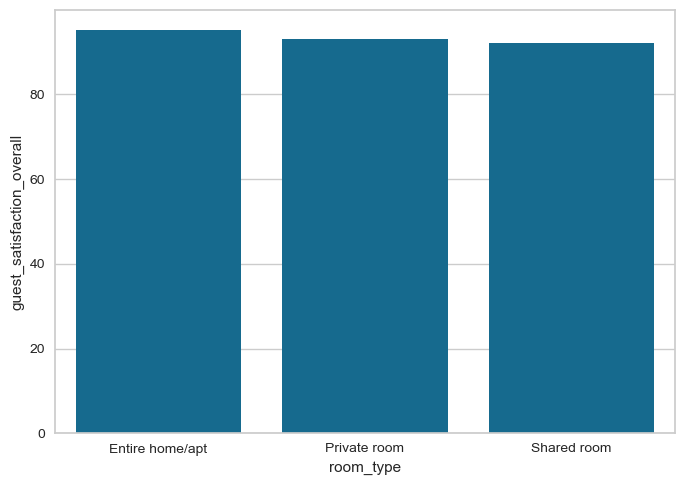

In [20]:
sns.barplot(barplot_df)

<AxesSubplot:xlabel='room_type', ylabel='dist'>

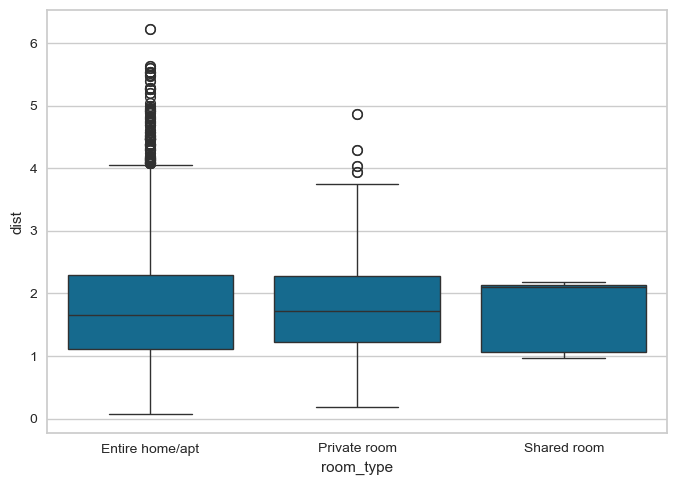

In [21]:
sns.boxplot(df_final,x='room_type',y='dist')

In [22]:
df_work=df_final.copy()

In [23]:
df_work

realSum        room_type  room_shared  room_private  person_capacity  \
0     138.963748  Entire home/apt            0             0              4.0   
1      91.627024  Entire home/apt            0             0              4.0   
2      76.629250     Private room            0             1              2.0   
3     151.852459  Entire home/apt            0             0              4.0   
4      98.657231  Entire home/apt            0             0              2.0   
...          ...              ...          ...           ...              ...   
5275  292.222248  Entire home/apt            0             0              4.0   
5276  306.048321  Entire home/apt            0             0              3.0   
5277  275.818433  Entire home/apt            0             0              4.0   
5278  313.078527  Entire home/apt            0             0              2.0   
5279  241.136081  Entire home/apt            0             0              2.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     1      1    0                10.0   
2                     0      0    0                10.0   
3                     1      0    1                10.0   
4                     1      1    0                10.0   
...                 ...    ...  ...                 ...   
5275                  1      0    1                10.0   
5276                  1      0    0                10.0   
5277                  1      0    1                10.0   
5278                  1      1    0                10.0   
5279                  1      1    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
5275                       100.0         1  0.453470    0.423897  323.568799   
5276                        98.0         1  0.317525    0.289876  289.750259   
5277                       100.0         1  1.391229    0.063723  235.298508   
5278                        99.0         2  1.054541    0.409451  117.986483   
5279                        98.0         1  0.998053    0.530075  606.993190   

      rest_index       lng       lat  
0     407.167958  23.73168  37.97776  
1      58.706522  23.72712  38.01435  
2     113.326684  23.73391  37.99529  
3     101.162069  23.73200  37.99800  
4      92.611125  23.73100  38.00000  
...          ...       ...       ...  
5275  478.298534  23.73184  37.97260  
5276  589.045383  23.73265  37.97370  
5277  298.440887  23.72676  37.96506  
5278  177.290336  23.74600  37.98000  
5279  390.018063  23.72732  37.96924  

[5279 rows x 17 columns]

In [24]:
df_work=pd.get_dummies(df_work)

In [25]:
df_work

realSum  room_shared  room_private  person_capacity  \
0     138.963748            0             0              4.0   
1      91.627024            0             0              4.0   
2      76.629250            0             1              2.0   
3     151.852459            0             0              4.0   
4      98.657231            0             0              2.0   
...          ...          ...           ...              ...   
5275  292.222248            0             0              4.0   
5276  306.048321            0             0              3.0   
5277  275.818433            0             0              4.0   
5278  313.078527            0             0              2.0   
5279  241.136081            0             0              2.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     1      1    0                10.0   
2                     0      0    0                10.0   
3                     1      0    1                10.0   
4                     1      1    0                10.0   
...                 ...    ...  ...                 ...   
5275                  1      0    1                10.0   
5276                  1      0    0                10.0   
5277                  1      0    1                10.0   
5278                  1      1    0                10.0   
5279                  1      1    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
5275                       100.0         1  0.453470    0.423897  323.568799   
5276                        98.0         1  0.317525    0.289876  289.750259   
5277                       100.0         1  1.391229    0.063723  235.298508   
5278                        99.0         2  1.054541    0.409451  117.986483   
5279                        98.0         1  0.998053    0.530075  606.993190   

      rest_index       lng       lat  room_type_Entire home/apt  \
0     407.167958  23.73168  37.97776                          1   
1      58.706522  23.72712  38.01435                          1   
2     113.326684  23.73391  37.99529                          0   
3     101.162069  23.73200  37.99800                          1   
4      92.611125  23.73100  38.00000                          1   
...          ...       ...       ...                        ...   
5275  478.298534  23.73184  37.97260                          1   
5276  589.045383  23.73265  37.97370                          1   
5277  298.440887  23.72676  37.96506                          1   
5278  177.290336  23.74600  37.98000                          1   
5279  390.018063  23.72732  37.96924                          1   

      room_type_Private room  room_type_Shared room  
0                          0                      0  
1                          0                      0  
2                          1                      0  
3                          0                      0  
4                          0                      0  
...                      ...                    ...  
5275                       0                      0  
5276                       0                      0  
5277                       0                      0  
5278                       0                      0  
5279                       0                      0  

[5279 rows x 19 columns]

In [26]:
df_work.drop(columns=['lat','lng'],inplace=True)

In [27]:
ss = StandardScaler()

In [28]:
ss.fit(df_work)

StandardScaler()

In [29]:
X = ss.transform(df_work)

In [30]:
X

array([[-0.11450839, -0.0456955 , -0.2851651 , ...,  0.28941499,
        -0.2851651 , -0.0456955 ],
       [-0.69759985, -0.0456955 , -0.2851651 , ...,  0.28941499,
        -0.2851651 , -0.0456955 ],
       [-0.88234171, -0.0456955 ,  3.50674054, ..., -3.45524608,
         3.50674054, -0.0456955 ],
       ...,
       [ 1.57126101, -0.0456955 , -0.2851651 , ...,  0.28941499,
        -0.2851651 , -0.0456955 ],
       [ 2.03022904, -0.0456955 , -0.2851651 , ...,  0.28941499,
        -0.2851651 , -0.0456955 ],
       [ 1.14404548, -0.0456955 , -0.2851651 , ...,  0.28941499,
        -0.2851651 , -0.0456955 ]])

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


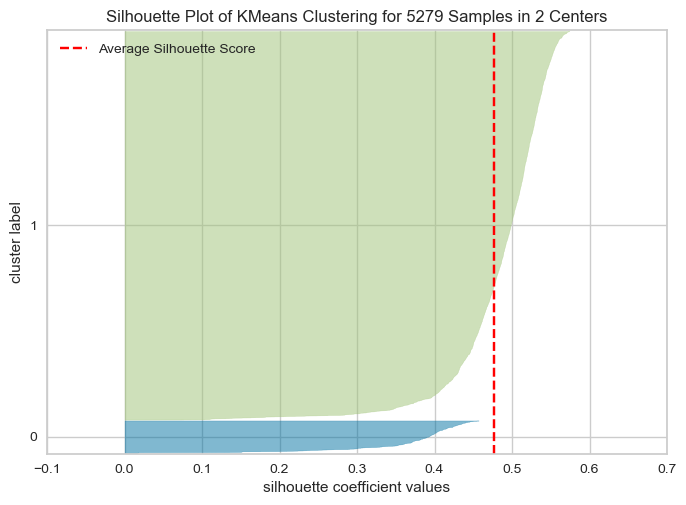

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


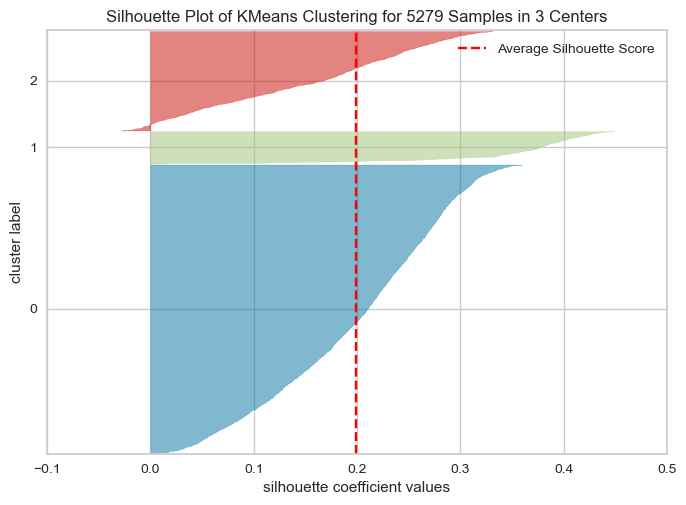

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


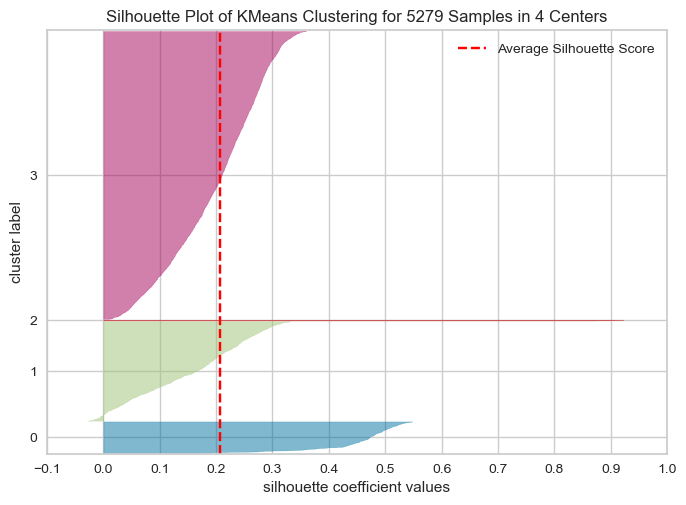

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


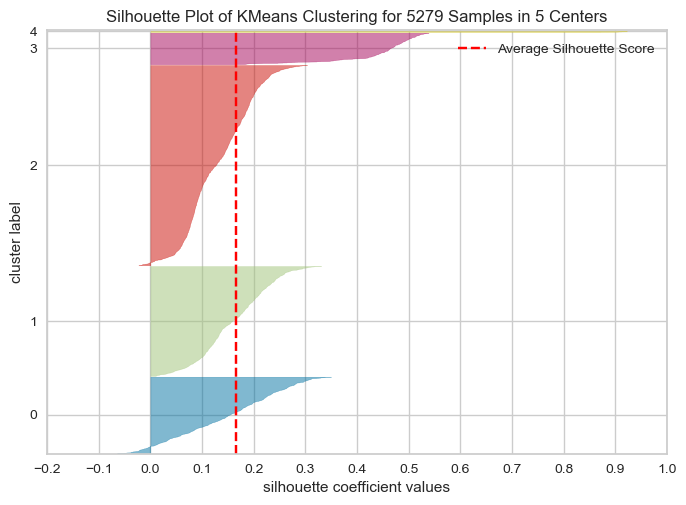

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


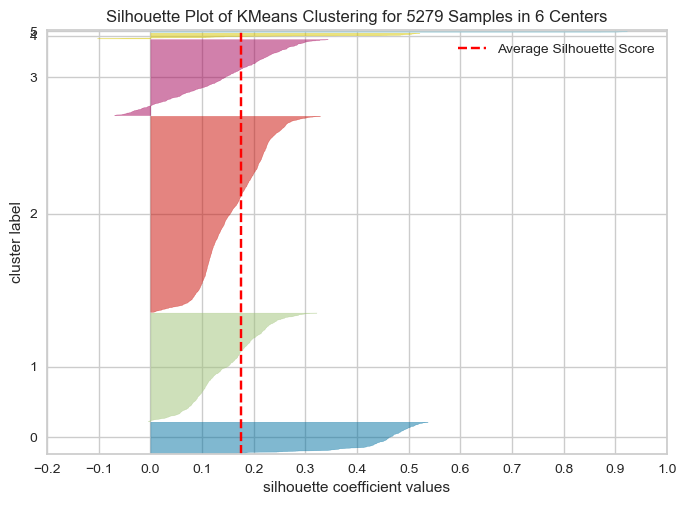

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


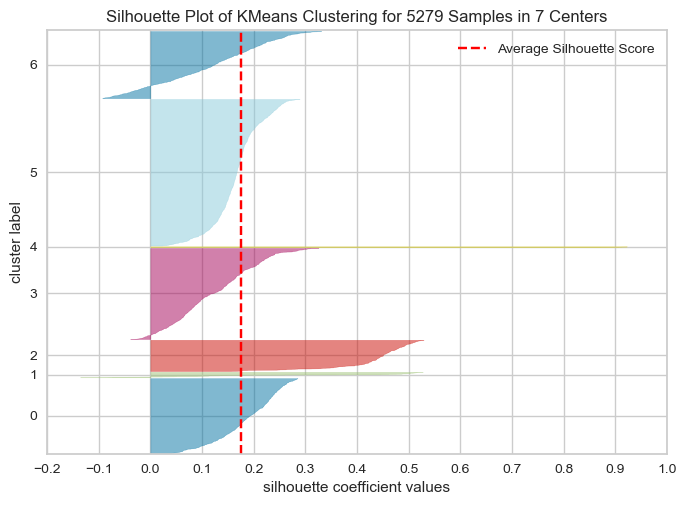

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


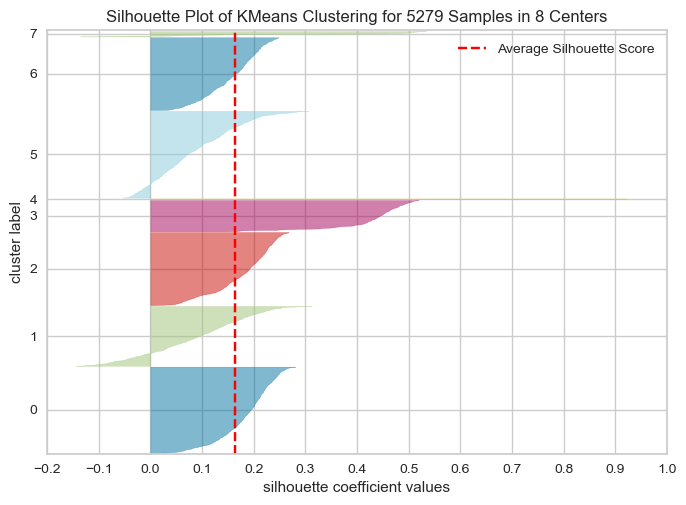

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


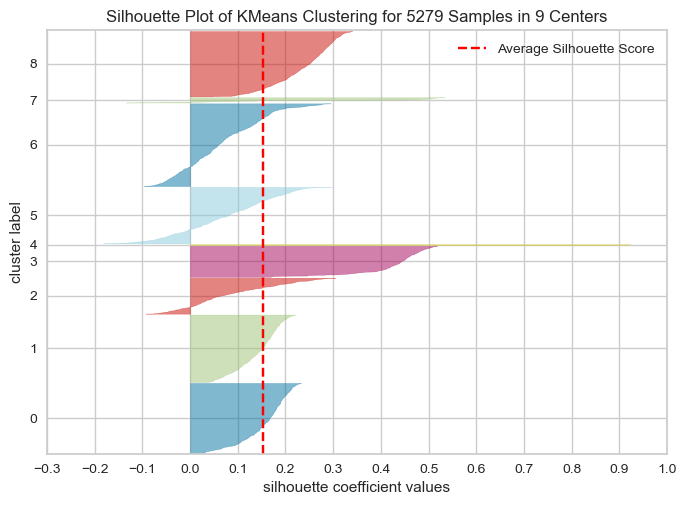

In [31]:
sillhouette_list= []
for i in range(2,10):  
    model_kmeans = KMeans(n_clusters=i).fit(X)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(X)
    silhouette_avg = silhouette_score(X, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)

2
3
4
5
6
7


C:\Users\spyro\AppData\Local\Temp\ipykernel_13788\616286498.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(K, distortions, 'bx-', color = 'b')
C:\Users\spyro\AppData\Local\Temp\ipykernel_13788\616286498.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(K, sil_scores, 'rx-', color = 'r')


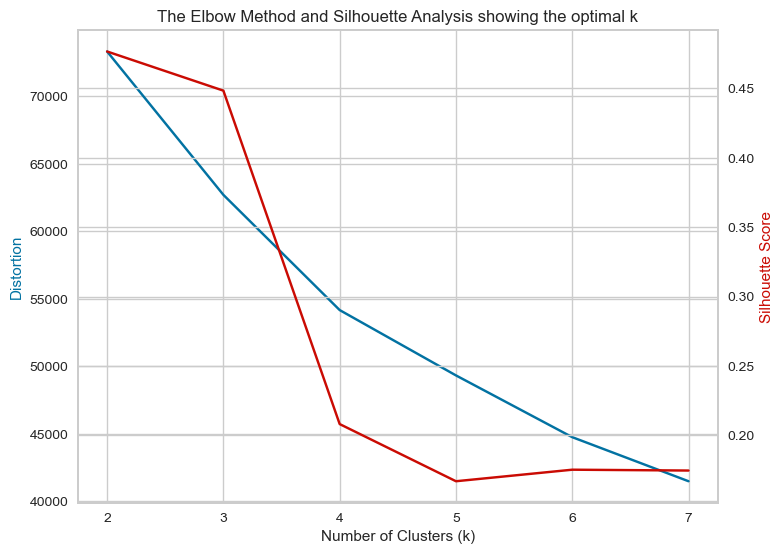

In [32]:
distortions = []
sil_scores = []
K = range(2,8)

for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k, n_init=100)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    labels = kmeanModel.labels_
    sil_scores.append(silhouette_score(X, labels, metric = 'euclidean'))
    
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Distortion', color = 'b')
ax1.plot(K, distortions, 'bx-', color = 'b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx() #instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Silhouette Score', color = 'r')
ax2.plot(K, sil_scores, 'rx-', color = 'r')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('The Elbow Method and Silhouette Analysis showing the optimal k')
plt.show()

In [33]:
kmeanModel = KMeans(n_clusters=5, n_init=300)

In [34]:
 kmeanModel.fit(X)

KMeans(n_clusters=5, n_init=300)

In [35]:
y_pred=kmeanModel.predict(X)

In [36]:
df_final['clusters']=y_pred

In [37]:
df_work['clusters']=y_pred

In [38]:
df_work

realSum  room_shared  room_private  person_capacity  \
0     138.963748            0             0              4.0   
1      91.627024            0             0              4.0   
2      76.629250            0             1              2.0   
3     151.852459            0             0              4.0   
4      98.657231            0             0              2.0   
...          ...          ...           ...              ...   
5275  292.222248            0             0              4.0   
5276  306.048321            0             0              3.0   
5277  275.818433            0             0              4.0   
5278  313.078527            0             0              2.0   
5279  241.136081            0             0              2.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     1      1    0                10.0   
2                     0      0    0                10.0   
3                     1      0    1                10.0   
4                     1      1    0                10.0   
...                 ...    ...  ...                 ...   
5275                  1      0    1                10.0   
5276                  1      0    0                10.0   
5277                  1      0    1                10.0   
5278                  1      1    0                10.0   
5279                  1      1    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
5275                       100.0         1  0.453470    0.423897  323.568799   
5276                        98.0         1  0.317525    0.289876  289.750259   
5277                       100.0         1  1.391229    0.063723  235.298508   
5278                        99.0         2  1.054541    0.409451  117.986483   
5279                        98.0         1  0.998053    0.530075  606.993190   

      rest_index  room_type_Entire home/apt  room_type_Private room  \
0     407.167958                          1                       0   
1      58.706522                          1                       0   
2     113.326684                          0                       1   
3     101.162069                          1                       0   
4      92.611125                          1                       0   
...          ...                        ...                     ...   
5275  478.298534                          1                       0   
5276  589.045383                          1                       0   
5277  298.440887                          1                       0   
5278  177.290336                          1                       0   
5279  390.018063                          1                       0   

      room_type_Shared room  clusters  
0                         0         3  
1                         0         4  
2                         0         0  
3                         0         1  
4                         0         4  
...                     ...       ...  
5275                      0         3  
5276                      0         3  
5277                      0         3  
5278                      0         1  
5279                      0         3  

[5279 rows x 18 columns]

In [39]:
df_work = df_work.groupby('clusters').mean()

In [40]:
df_work.reset_index()

clusters     realSum  room_shared  room_private  person_capacity  \
0         0  112.838060          0.0           1.0         2.561713   
1         1  159.121764          0.0           0.0         4.976070   
2         2   78.610490          1.0           0.0         2.363636   
3         3  231.695449          0.0           0.0         3.886010   
4         4  116.338371          0.0           0.0         3.113969   

   host_is_superhost     multi       biz  cleanliness_rating  \
0           0.264484  0.345088  0.455919            9.438287   
1           0.403191  0.268310  0.326323            9.681653   
2           0.000000  0.454545  0.545455            9.090909   
3           0.568912  0.201036  0.616580            9.766839   
4           0.416304  0.279383  0.305896            9.599525   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                   93.141058  1.073048  1.826949    0.475288  137.912141   
1                   95.683829  2.076142  2.061241    0.493506  109.375219   
2                   92.090909  1.000000  1.637747    0.276272  151.653892   
3                   96.125389  1.178238  0.844877    0.344014  334.628478   
4                   94.507321  0.900277  2.025325    0.523417  108.393023   

   rest_index  room_type_Entire home/apt  room_type_Private room  \
0  209.330517                        0.0                     1.0   
1  154.458957                        1.0                     0.0   
2  325.413162                        0.0                     0.0   
3  477.193242                        1.0                     0.0   
4  156.254692                        1.0                     0.0   

   room_type_Shared room  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0

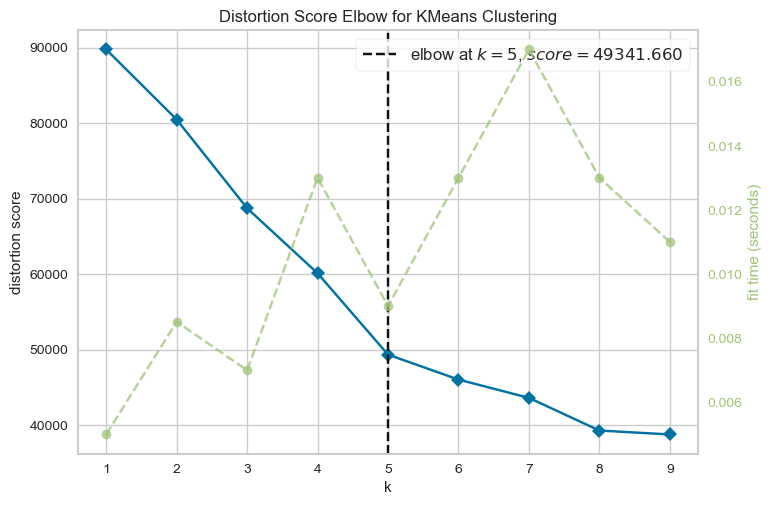

In [41]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), locate_elbow=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()


In [42]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=51)

In [43]:
tsne_X = tsne.fit_transform(X)

In [44]:
tsne_df = pd.DataFrame(tsne_X, columns=['t-SNE1', 't-SNE2'])
tsne_df['Target'] = y_pred

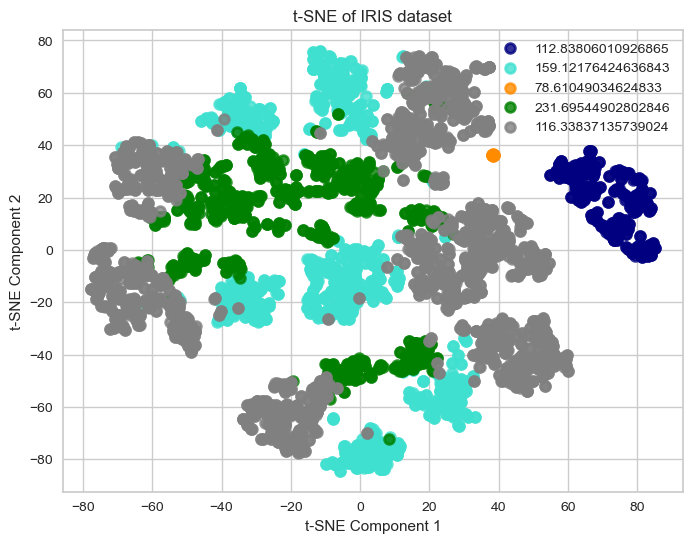

In [45]:
# Create a figure and an axes object
fig_tsne, ax_tsne = plt.subplots(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange','green','grey']
lw = 2 #line width

# Plot on the axes object instead of using plt directly
for color ,i, target_name in zip(colors, [0, 1, 2,3,4], df_work.realSum):
    ax_tsne.scatter(tsne_df.loc[tsne_df['Target'] == i, 't-SNE1'],
                    tsne_df.loc[tsne_df['Target'] == i, 't-SNE2'],
                    color=color, alpha=.8, lw=lw,
                    label=target_name)

ax_tsne.legend(loc='best', shadow=False, scatterpoints=1)
ax_tsne.set_title('t-SNE of IRIS dataset')
ax_tsne.set_xlabel('t-SNE Component 1')
ax_tsne.set_ylabel('t-SNE Component 2')

# Save the figure to a variable
tsne_plot = fig_tsne

In [46]:
import folium

In [47]:
df_final

realSum        room_type  room_shared  room_private  person_capacity  \
0     138.963748  Entire home/apt            0             0              4.0   
1      91.627024  Entire home/apt            0             0              4.0   
2      76.629250     Private room            0             1              2.0   
3     151.852459  Entire home/apt            0             0              4.0   
4      98.657231  Entire home/apt            0             0              2.0   
...          ...              ...          ...           ...              ...   
5275  292.222248  Entire home/apt            0             0              4.0   
5276  306.048321  Entire home/apt            0             0              3.0   
5277  275.818433  Entire home/apt            0             0              4.0   
5278  313.078527  Entire home/apt            0             0              2.0   
5279  241.136081  Entire home/apt            0             0              2.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     1      1    0                10.0   
2                     0      0    0                10.0   
3                     1      0    1                10.0   
4                     1      1    0                10.0   
...                 ...    ...  ...                 ...   
5275                  1      0    1                10.0   
5276                  1      0    0                10.0   
5277                  1      0    1                10.0   
5278                  1      1    0                10.0   
5279                  1      1    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           96.0         1  0.407278    0.304570  240.306496   
1                           99.0         1  4.367463    0.297474   39.802996   
2                          100.0         1  2.194174    0.385247   78.734001   
3                          100.0         2  2.508982    0.563473   68.774881   
4                           95.0         1  2.740581    0.725045   62.902859   
...                          ...       ...       ...         ...         ...   
5275                       100.0         1  0.453470    0.423897  323.568799   
5276                        98.0         1  0.317525    0.289876  289.750259   
5277                       100.0         1  1.391229    0.063723  235.298508   
5278                        99.0         2  1.054541    0.409451  117.986483   
5279                        98.0         1  0.998053    0.530075  606.993190   

      rest_index       lng       lat  clusters  
0     407.167958  23.73168  37.97776         3  
1      58.706522  23.72712  38.01435         4  
2     113.326684  23.73391  37.99529         0  
3     101.162069  23.73200  37.99800         1  
4      92.611125  23.73100  38.00000         4  
...          ...       ...       ...       ...  
5275  478.298534  23.73184  37.97260         3  
5276  589.045383  23.73265  37.97370         3  
5277  298.440887  23.72676  37.96506         3  
5278  177.290336  23.74600  37.98000         1  
5279  390.018063  23.72732  37.96924         3  

[5279 rows x 18 columns]

In [50]:
map_osm = folium.Map(location=[23.73168,37.97776], zoom_start=11)

df_final.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, )
                                             .add_to(map_osm), axis=1)

map_osm

In [59]:
df_0=df_final[df_final['clusters']==0]
df_1=df_final[df_final['clusters']==1]
df_2=df_final[df_final['clusters']==2]
df_3=df_final[df_final['clusters']==3]
df_4=df_final[df_final['clusters']==4]

In [54]:
map_osm = folium.Map(location=[23.73168,37.97776], zoom_start=11)

df_0.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, )
                                             .add_to(map_osm), axis=1)

map_osm

In [60]:
map_osm = folium.Map(location=[23.73168,37.97776], zoom_start=11)

df_1.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, )
                                             .add_to(map_osm), axis=1)

map_osm

In [61]:
map_osm = folium.Map(location=[23.73168,37.97776], zoom_start=11)

df_2.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, )
                                             .add_to(map_osm), axis=1)

map_osm

In [62]:
map_osm = folium.Map(location=[23.73168,37.97776], zoom_start=11)

df_3.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, )
                                             .add_to(map_osm), axis=1)

map_osm

In [63]:
map_osm = folium.Map(location=[23.73168,37.97776], zoom_start=11)

df_4.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, )
                                             .add_to(map_osm), axis=1)

map_osm

In [64]:
df_work.reset_index()

clusters     realSum  room_shared  room_private  person_capacity  \
0         0  112.838060          0.0           1.0         2.561713   
1         1  159.121764          0.0           0.0         4.976070   
2         2   78.610490          1.0           0.0         2.363636   
3         3  231.695449          0.0           0.0         3.886010   
4         4  116.338371          0.0           0.0         3.113969   

   host_is_superhost     multi       biz  cleanliness_rating  \
0           0.264484  0.345088  0.455919            9.438287   
1           0.403191  0.268310  0.326323            9.681653   
2           0.000000  0.454545  0.545455            9.090909   
3           0.568912  0.201036  0.616580            9.766839   
4           0.416304  0.279383  0.305896            9.599525   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                   93.141058  1.073048  1.826949    0.475288  137.912141   
1                   95.683829  2.076142  2.061241    0.493506  109.375219   
2                   92.090909  1.000000  1.637747    0.276272  151.653892   
3                   96.125389  1.178238  0.844877    0.344014  334.628478   
4                   94.507321  0.900277  2.025325    0.523417  108.393023   

   rest_index  room_type_Entire home/apt  room_type_Private room  \
0  209.330517                        0.0                     1.0   
1  154.458957                        1.0                     0.0   
2  325.413162                        0.0                     0.0   
3  477.193242                        1.0                     0.0   
4  156.254692                        1.0                     0.0   

   room_type_Shared room  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0

In [ ]:
df_work.groupby('clusters')

In [65]:
df_final.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  138.963748  Entire home/apt            0             0              4.0   
1   91.627024  Entire home/apt            0             0              4.0   
2   76.629250     Private room            0             1              2.0   
3  151.852459  Entire home/apt            0             0              4.0   
4   98.657231  Entire home/apt            0             0              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  1      1    0                10.0   
1                  1      1    0                10.0   
2                  0      0    0                10.0   
3                  1      0    1                10.0   
4                  1      1    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        96.0         1  0.407278    0.304570  240.306496   
1                        99.0         1  4.367463    0.297474   39.802996   
2                       100.0         1  2.194174    0.385247   78.734001   
3                       100.0         2  2.508982    0.563473   68.774881   
4                        95.0         1  2.740581    0.725045   62.902859   

   rest_index       lng       lat  clusters  
0  407.167958  23.73168  37.97776         3  
1   58.706522  23.72712  38.01435         4  
2  113.326684  23.73391  37.99529         0  
3  101.162069  23.73200  37.99800         1  
4   92.611125  23.73100  38.00000         4

In [66]:
df_weekdays.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  129.824479  Entire home/apt            0             0              4.0   
1  138.963748  Entire home/apt            0             0              4.0   
2  156.304923  Entire home/apt            0             0              3.0   
3   91.627024  Entire home/apt            0             0              4.0   
4   74.051508     Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      0    0                10.0   
1                  1      1    0                10.0   
2                  1      0    1                10.0   
3                  1      1    0                10.0   
4                  0      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                       100.0         2  2.813964    0.881890   55.348572   
1                        96.0         1  0.407293    0.304568  240.306654   
2                        98.0         1  1.237211    0.288488  199.507366   
3                        99.0         1  4.367457    0.297467   39.803047   
4                       100.0         1  2.194185    0.385266   78.733405   

   rest_index       lng       lat  
0   78.778377  23.76600  37.98300  
1  407.167696  23.73168  37.97776  
2  395.967403  23.72200  37.97900  
3   58.706578  23.72712  38.01435  
4  113.325973  23.73391  37.99529

In [67]:
df_weekends.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  138.963748  Entire home/apt            0             0              4.0   
1   91.627024  Entire home/apt            0             0              4.0   
2   76.629250     Private room            0             1              2.0   
3  151.852459  Entire home/apt            0             0              4.0   
4   98.657231  Entire home/apt            0             0              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  1      1    0                10.0   
1                  1      1    0                10.0   
2                  0      0    0                10.0   
3                  1      0    1                10.0   
4                  1      1    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        96.0         1  0.407278    0.304570  240.306496   
1                        99.0         1  4.367463    0.297474   39.802996   
2                       100.0         1  2.194174    0.385247   78.734001   
3                       100.0         2  2.508982    0.563473   68.774881   
4                        95.0         1  2.740581    0.725045   62.902859   

   rest_index       lng       lat  
0  407.167958  23.73168  37.97776  
1   58.706522  23.72712  38.01435  
2  113.326684  23.73391  37.99529  
3  101.162069  23.73200  37.99800  
4   92.611125  23.73100  38.00000

In [70]:
df_barplot=df_final.groupby('room_type')['realSum'].median()

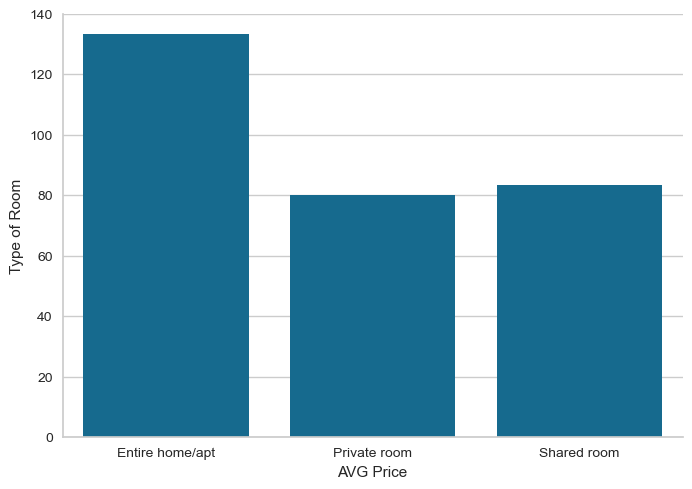

In [75]:
sns.barplot(df_barplot)

plt.xlabel('AVG Price')
plt.ylabel('Type of Room')
sns.despine()

plt.show()


C:\Users\spyro\AppData\Local\Temp\ipykernel_13788\4144722580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_barplot, palette=custom_palette)


ValueError: The palette dictionary is missing keys: {'Entire home/apt', 'Private room'}

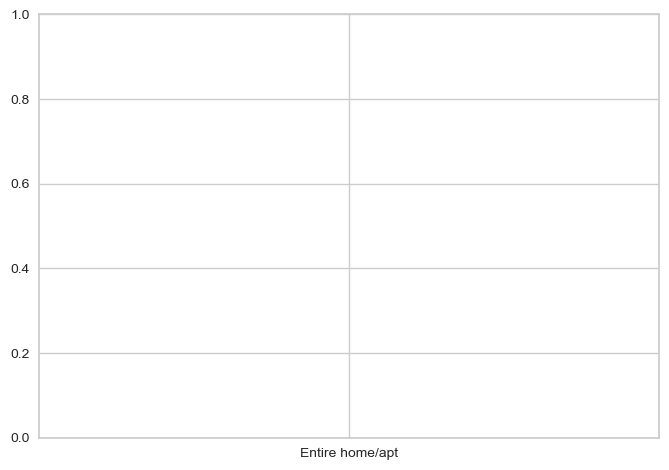

In [86]:
df_barplot=df_weekdays.groupby('room_type')['realSum'].median()
sns.barplot(df_barplot, palette=custom_palette)
plt.xlabel('')
plt.ylabel('')
custom_palette = {'Entire home/apt': 'skyblue', 'Private room': 'salmon','Shared room':'red'}
plt.show()


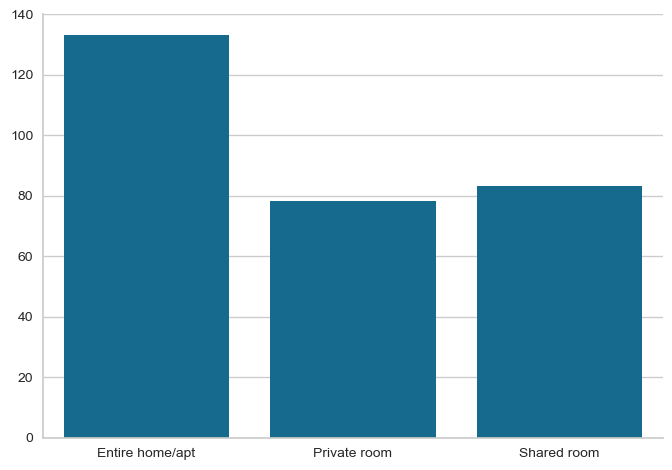

In [81]:
df_barplot=df_weekends.groupby('room_type')['realSum'].median()
sns.barplot(df_barplot)

plt.xlabel('')
plt.ylabel('')
sns.despine()

plt.show()


In [87]:
df_final.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  138.963748  Entire home/apt            0             0              4.0   
1   91.627024  Entire home/apt            0             0              4.0   
2   76.629250     Private room            0             1              2.0   
3  151.852459  Entire home/apt            0             0              4.0   
4   98.657231  Entire home/apt            0             0              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  1      1    0                10.0   
1                  1      1    0                10.0   
2                  0      0    0                10.0   
3                  1      0    1                10.0   
4                  1      1    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        96.0         1  0.407278    0.304570  240.306496   
1                        99.0         1  4.367463    0.297474   39.802996   
2                       100.0         1  2.194174    0.385247   78.734001   
3                       100.0         2  2.508982    0.563473   68.774881   
4                        95.0         1  2.740581    0.725045   62.902859   

   rest_index       lng       lat  clusters  
0  407.167958  23.73168  37.97776         3  
1   58.706522  23.72712  38.01435         4  
2  113.326684  23.73391  37.99529         0  
3  101.162069  23.73200  37.99800         1  
4   92.611125  23.73100  38.00000         4